# ENGR30004

## Week 11 - Shortest Path

Last week, we looked at calculating the distance between two given nodes on a directed weighted graph. This week, we will look at obtaining the shortest path between two given nodes on a directed weighted graph.

If time permits, we will also look at topological sorting.

### Learning Objectives

- Shortest Path Calculations
    - Understand the need for shortest path calculations
    - Understand Dijkstra's Algorithm for calculating shortest path and it's complexities
    - Understand where Dijkstra's Algorithm cannot be applied
    
- Topological Sorting
    - Understand what is topological sorting
    - Understand the use of DFS for achieving a topological sort of a given digraph

### Problem 1: Dijkstra's Algorithm for Shortest Path

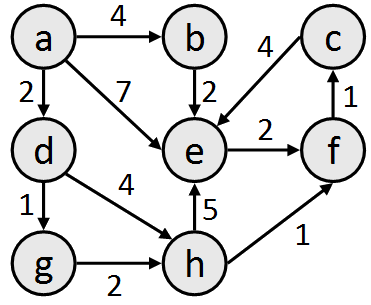

from: CS106B at Stanford

From last week, we have the representation of this graph in both adjacency matrix and adjacency list formats.

Use either of these representations (or a representation of your own) in your answers to the next two questions.

In [ ]:
# a=0, b=1, c=2, d=3, e=4, f=5, g=6, h=7

#Unweighted representation
al = [[1, 3, 4], #a
      [4], #b
      [], #c
      [6, 7], #d
      [5], #e
      [2], #f
      [7], #g
      [4, 5], #h
     ]

#Weighted representation
      #a, b, c, d, e, f, g, h 
am = [[0, 4, 0, 2, 7, 0, 0, 0], #a
      [0, 0, 0, 0, 2, 0, 0, 0], #b
      [0, 0, 0, 0, 4, 0, 0, 0], #c
      [0, 0, 0, 0, 0, 0, 1, 4], #d
      [0, 0, 0, 0, 0, 2, 0, 0], #e
      [0, 0, 1, 0, 0, 0, 0, 0], #f
      [0, 0, 0, 0, 0, 0, 0, 2], #g
      [0, 0, 0, 0, 5, 1, 0, 0], #h
     ]

Write a dijkstra's algorithm implementation to find the shortest path between two given nodes, for a weighted digraph.

In [ ]:
def dijkstras(start, end, graph):
    queue = [i for i in range(len(graph))]
    print(queue)
    distances = [10000]*len(graph)
    previous = [None]*len(graph)
    
    distances[start] = 0
    
    while queue:
        
        u_dist = 10000
        #find index with the minimum distance
        for i in queue:
            if distances[i] < u_dist:
                u_dist = distances[i]
                u = i
        
        print(u, queue)
        queue.remove(u)
        
        for k in range(len(graph)):
            if(graph[u][k] > 0 and k in queue):
                alt = distances[u] + graph[u][k]
                if alt < distances[k]:
                    distances[k] = alt
                    previous[k] = u
                    
    return distances, previous
    

In [ ]:
dijkstras(0, 7, am)

[0, 1, 2, 3, 4, 5, 6, 7]
0 [0, 1, 2, 3, 4, 5, 6, 7]
3 [1, 2, 3, 4, 5, 6, 7]
6 [1, 2, 4, 5, 6, 7]
1 [1, 2, 4, 5, 7]
7 [2, 4, 5, 7]
4 [2, 4, 5]
5 [2, 5]
2 [2]


([0, 4, 7, 2, 6, 6, 3, 5], [None, 0, 5, 0, 1, 7, 3, 6])

### Problem 2: Topological Sorting

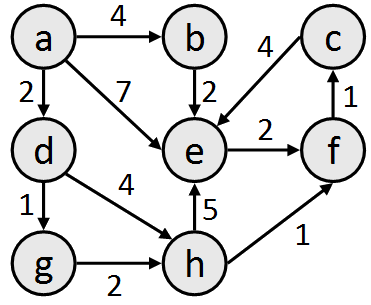

Find a topological sorting for this graph. (Please remove the edge from `c` to `e` -- in order to remove the cycle)